<a href="https://colab.research.google.com/github/HarmanBhutani/ML_projects/blob/main/Assignment3_300144160_partB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import nltk
import pandas as pd
import numpy as np
import csv
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [98]:
import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import re
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve,auc,plot_roc_curve
from sklearn.svm import SVC
from sklearn.naive_bayes import BaseNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
#pip install xgboost
from xgboost import XGBRFClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [26]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
tweets_df = pd.read_csv("Covid_train_data.csv", encoding='latin-1')

In [28]:
tweets_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [29]:
len(tweets_df)

41157

In [30]:
# Print the value counts of Country column
Location_count=tweets_df["Location"].value_counts()
Location_count

London                 540
United States          528
London, England        520
New York, NY           395
Washington, DC         373
                      ... 
El Dorado Hills, CA      1
Sonoma County, CA        1
Evanston, Ill.           1
Always Hungry, USA       1
????, ????? ????         1
Name: Location, Length: 12220, dtype: int64

In [31]:
# Print the value counts of Sentiments column
Sentiments_count=tweets_df["Sentiment"].value_counts()
Sentiments_count

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


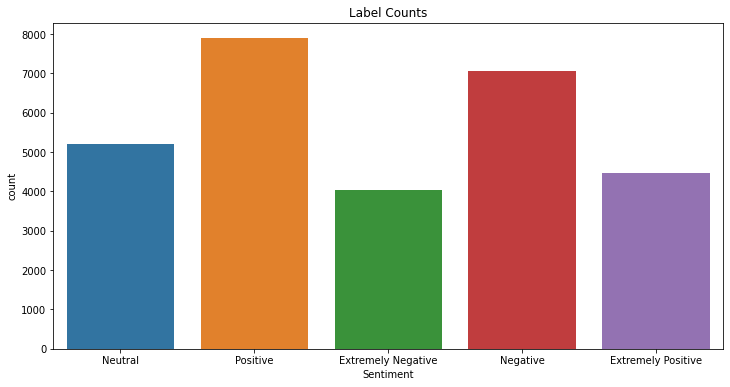

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (12, 6)) 
sns.countplot(tweets_df["Sentiment"])
plt.title("Label Counts")
plt.show()

In [32]:
pos = tweets_df.loc[tweets_df['Sentiment']=='Positive','OriginalTweet']
neg = tweets_df.loc[tweets_df['Sentiment']=='Negative','OriginalTweet']
Ext_pos = tweets_df.loc[tweets_df['Sentiment']=='Extremely Positive','OriginalTweet']
Ext_neg = tweets_df.loc[tweets_df['Sentiment']=='Extremely Negative','OriginalTweet']
neu = tweets_df.loc[tweets_df['Sentiment']=='Neutral','OriginalTweet']

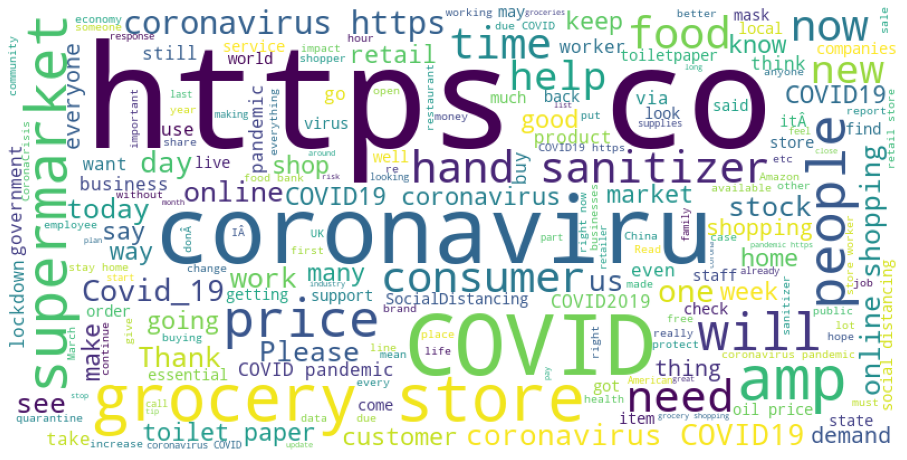

In [ ]:
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(pos))
plt.figure(figsize = (16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

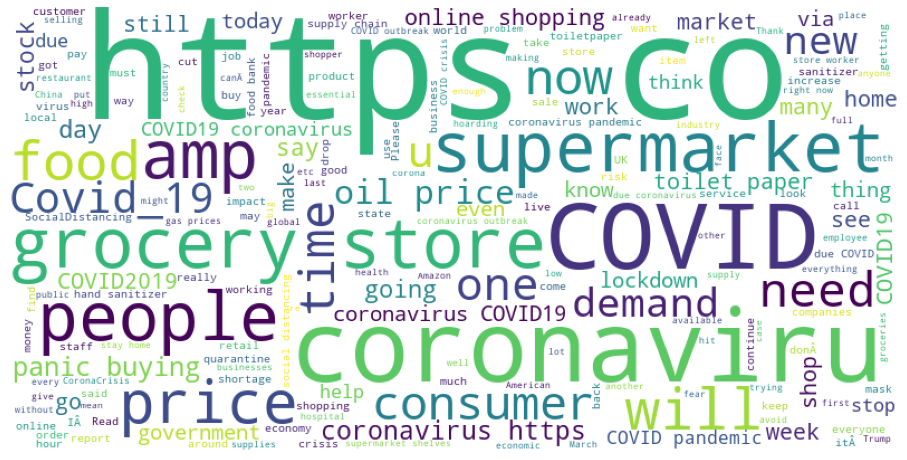

In [ ]:
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(neg))
plt.figure(figsize = (16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

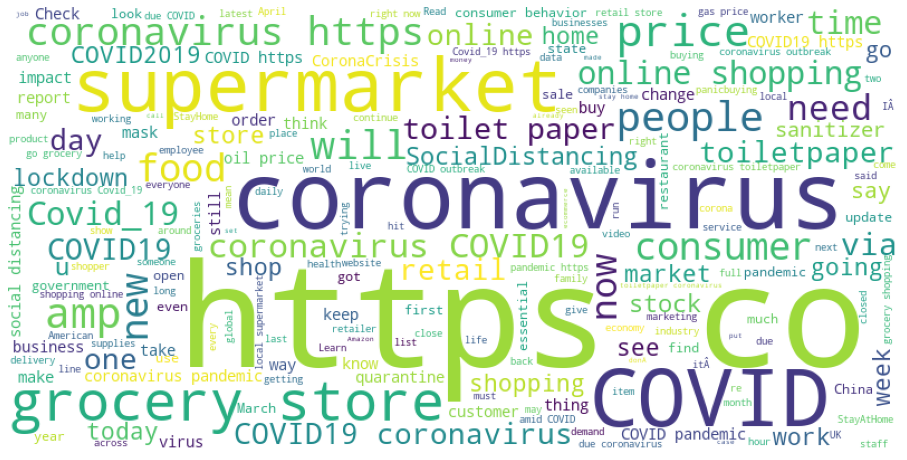

In [ ]:
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(neu))
plt.figure(figsize = (16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

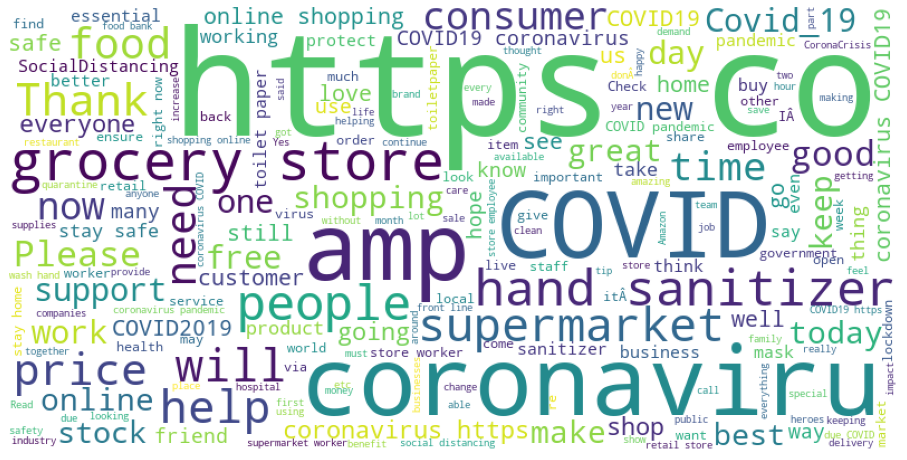

In [ ]:
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(Ext_pos))
plt.figure(figsize = (16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

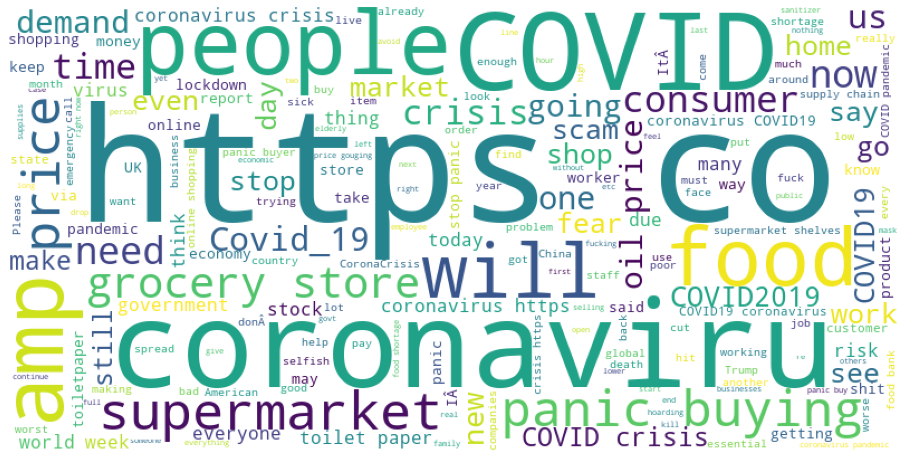

In [ ]:
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(Ext_neg))
plt.figure(figsize = (16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

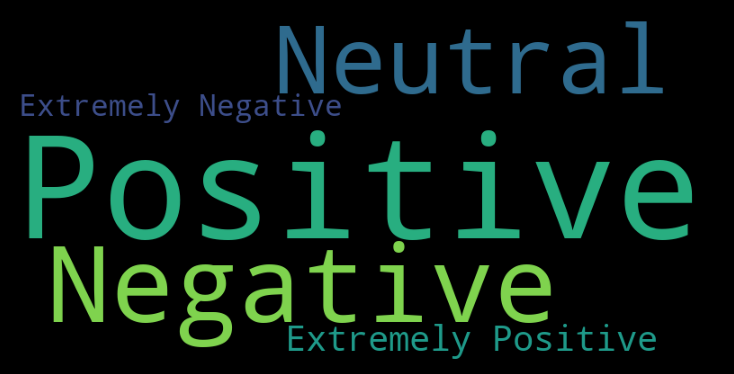

In [ ]:
# BUILD WORD CLOUD
from wordcloud import WordCloud 
wcloud = WordCloud(width=800, height=400).generate_from_frequencies(frequency_dist)

#plotting the wordcloud
plt.figure( figsize=(10,5), facecolor='k')
plt.imshow(wcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [33]:
# Display the first five rows
display(tweets_df.head())
# Print the summary statistics
print(tweets_df.describe())
# Print the info
print(tweets_df.info())

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


           UserName    ScreenName
count  41157.000000  41157.000000
mean   24377.000000  69329.000000
std    11881.146851  11881.146851
min     3799.000000  48751.000000
25%    14088.000000  59040.000000
50%    24377.000000  69329.000000
75%    34666.000000  79618.000000
max    44955.000000  89907.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB
None


In [ ]:
# We do not need first two columns. Let's drop them out.
tweets_df.drop(columns=["UserName", "ScreenName"], axis=1, inplace=True)
# Drop duplicated rows
tweets_df.drop_duplicates(inplace=True)
# Created at column's type should be datatime
tweets_df["TweetAt"] = pd.to_datetime(tweets_df["TweetAt"])
# Print the info again
print(tweets_df.info())

In [38]:
def process_tweets(tweet):
    
    # Remove links
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    
    # Remove mentions and hashtag
    tweet = re.sub(r'\@\w+|\#','', tweet)
    
    # Tokenize the words
    tokenized = word_tokenize(tweet)

    # Remove the stop words
    tokenized = [token for token in tokenized if token not in stopwords.words("english")] 

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    tokenized = [lemmatizer.lemmatize(token, pos='a') for token in tokenized]

    # Remove non-alphabetic characters and keep the words contains three or more letters
    tokenized = [token for token in tokenized if token.isalpha() and len(token)>2]
    
    return tokenized
    
# Call the function and store the result into a new column
tweets_df["Processed"] = tweets_df["OriginalTweet"].str.lower().apply(process_tweets)

# Print the first fifteen rows of Processed
display(tweets_df[["Processed"]].head(15))

,Processed
0,[]
1,"[advice, talk, neighbours, family, exchange, p..."
2,"[coronavirus, australia, woolworths, give, eld..."
3,"[food, stock, one, empty, please, panic, enoug..."
4,"[ready, supermarket, outbreak, paranoid, food,..."
5,"[news, first, confirmed, case, came, sullivan,..."
6,"[cashier, grocery, store, sharing, insights, p..."
7,"[supermarket, today, buy, toilet, paper, rebel..."
8,"[due, retail, store, classroom, atlanta, open,..."
9,"[corona, prevention, stop, buy, things, cash, ..."


In [40]:
# Get the tweet lengths
tweets_df["Length"] = tweets_df["OriginalTweet"].str.len()
# Get the number of words in tweets
tweets_df["Words"] = tweets_df["OriginalTweet"].str.split().str.len()
# Display the new columns
display(tweets_df[["Length", "Words"]])

,Length,Words
0,111,8
1,237,38
2,131,14
3,306,42
4,310,40
...,...,...
41152,102,12
41153,138,23
41154,136,18
41155,111,18


In [41]:
tweets_df["Location"].fillna("unknown", inplace=True)

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize a Tf-idf Vectorizer
vectorizer = TfidfVectorizer(max_features=100)
# Fit and transform the vectorizer
tfidf_matrix = vectorizer.fit_transform([' '.join(l) for l in tweets_df["Processed"]])
# Let's see what we have
display(tfidf_matrix)
# Create a DataFrame for tf-idf vectors and display the first rows
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns= vectorizer.get_feature_names())
display(tfidf_df)

<41157x100 sparse matrix of type '<class 'numpy.float64'>'
	with 186001 stored elements in Compressed Sparse Row format>

,also,amid,amp,back,business,buy,buying,consumer,coronavirus,could,covid,crisis,customers,day,delivery,demand,due,employees,essential,even,every,everyone,first,food,get,going,good,government,grocery,hand,health,help,high,home,impact,items,keep,know,like,local,...,prices,products,retail,right,safe,sanitizer,see,shelves,shop,shopping,social,socialdistancing,spread,staff,stay,still,stock,stop,store,stores,supermarket,supplies,supply,take,thank,think,time,today,toilet,toiletpaper,use,via,virus,way,week,work,workers,working,world,would
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.497447,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.702164,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.617436,0.0,0.0,0.0,0.0,0.0,0.000000,0.243451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.453185,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.115334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.287786,0.0,0.358077,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.291483,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.551151,0.0,0.250835,0.0,0.0,0.0,0.000000,0.000000,0.0,0.282739,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.197031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.305863,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.428518,0.0,0.0,0.0,0.292708,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41152,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.549792,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.503874,0.0,0.0,0.0,0.344182,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
41153,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.558534,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.829481,0.0,0.0,0.0,0.0,0.0,0.0
41154,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0

In [43]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.preprocessing import LabelEncoder
# Encode the labels
le = LabelEncoder()
tweets_df["Label_enc"] = le.fit_transform(tweets_df["Sentiment"])
# Display the encoded labels
display(tweets_df[["Label_enc"]].head())

,Label_enc
0,3
1,4
2,4
3,4
4,0


In [44]:
X = tweets_df['Processed']
y = tweets_df["Label_enc"]

In [45]:
tweets_test = pd.read_csv("Covid_test_data.csv")

In [46]:
# Encode the labels
le = LabelEncoder()
tweets_test["Label_enc"] = le.fit_transform(tweets_test["Sentiment"])
# Display the encoded labels
display(tweets_test[["Label_enc"]].head())

,Label_enc
0,0
1,4
2,1
3,2
4,3


In [47]:
def process_tweets(tweet):
    
    # Remove links
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    
    # Remove mentions and hashtag
    tweet = re.sub(r'\@\w+|\#','', tweet)
    
    # Tokenize the words
    tokenized = word_tokenize(tweet)

    # Remove the stop words
    tokenized = [token for token in tokenized if token not in stopwords.words("english")] 

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    tokenized = [lemmatizer.lemmatize(token, pos='a') for token in tokenized]

    # Remove non-alphabetic characters and keep the words contains three or more letters
    tokenized = [token for token in tokenized if token.isalpha() and len(token)>2]
    
    return tokenized
    
# Call the function and store the result into a new column
tweets_test["Processed"] = tweets_test["OriginalTweet"].str.lower().apply(process_tweets)

# Print the first fifteen rows of Processed
display(tweets_test[["Processed"]].head(15))

,Processed
0,"[trending, new, yorkers, encounter, empty, sup..."
1,"[could, find, hand, sanitizer, fred, meyer, tu..."
2,"[find, protect, loved, ones, coronavirus]"
3,"[panic, buying, hits, newyork, city, anxious, ..."
4,"[toiletpaper, dunnypaper, coronavirus, coronav..."
5,"[remember, last, time, paid, gallon, regular, ..."
6,"[voting, age, coronavirus, hand, sanitizer, su..."
7,"[stop, without, protecting, healthworkers, pri..."
8,"[twitter, pharmacist, sell, hand, sanitizer, l..."
9,"[anyone, supermarket, last, days, went, normal..."


In [49]:
X_test = tweets_test['Processed']
y_test = tweets_test["Label_enc"]

In [57]:
pip install sklearn

In [60]:
model_vectorizer = TfidfVectorizer()
# First fit the vectorizer with our training set
tfidf_train = vectorizer.fit_transform([' '.join(l) for l in X])
# Now we can fit our test data with the same vectorizer
tfidf_test = vectorizer.transform([' '.join(l) for l in X_test])

In [62]:
from functools import reduce

In [63]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_iris

def generate_rf(X_train, y_train, X_test, y_test):
    rf = RandomForestClassifier(n_estimators=5, min_samples_leaf=3)
    rf.fit(X_train, y_train)
    print ("rf score ", rf.score(X_test, y_test))
    return rf

def combine_rfs(rf_a, rf_b):
    rf_a.estimators_ += rf_b.estimators_
    rf_a.n_estimators = len(rf_a.estimators_)
    return rf_a


# in the line below, we create 10 random forest classifier models
rfs = [generate_rf(tfidf_train, y, tfidf_test, y_test)]
# in this step below, we combine the list of random forest models into one giant model
rf_combined = reduce(combine_rfs, rfs)
# the combined model scores better than *most* of the component models
print ("rf combined score", rf_combined.score(tfidf_test, y_test))

rf score  0.3504476040021064
rf combined score 0.3504476040021064


In [64]:
# Print the accuracy score
best_accuracy = cross_val_score(rf_combined, tfidf_test, y_test, cv=10, scoring='accuracy').max()
print("Accuracy:",best_accuracy)

Accuracy: 0.3447368421052632


In [65]:
from gensim.models import word2vec

wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in  X.str.join(' ')]

feature_size = 100
window_context = 10  # Context window size                                                                                    
min_word_count = 1   # Minimum word count, i.e., words > this are going to be included in the model                        
sample = 1e-3        # Downsample setting for frequent words

w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                              window=window_context, min_count = min_word_count,
                              sample=sample)

In [66]:
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector
   
def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)


w2v_feature_array = averaged_word_vectorizer(corpus=tokenized_corpus, model=w2v_model,
                                             num_features=feature_size)
X_train_wordvec = pd.DataFrame(w2v_feature_array)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [67]:
from gensim.models import word2vec

wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in  X_test.str.join(' ')]

feature_size = 100
window_context = 10  # Context window size                                                                                    
min_word_count = 1   # Minimum word count, i.e., words > this are going to be included in the model                        
sample = 1e-3        # Downsample setting for frequent words

w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                              window=window_context, min_count = min_word_count,
                              sample=sample)

In [68]:
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector
   
def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)


w2v_feature_array = averaged_word_vectorizer(corpus=tokenized_corpus, model=w2v_model,
                                             num_features=feature_size)
X_test_wordvec = pd.DataFrame(w2v_feature_array)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [70]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_iris

def generate_rf(X_train, y_train, X_test, y_test):
    rf = RandomForestClassifier(n_estimators=5, min_samples_leaf=3)
    rf.fit(X_train, y_train)
    print ("rf score ", rf.score(X_test, y_test))
    return rf

def combine_rfs(rf_a, rf_b):
    rf_a.estimators_ += rf_b.estimators_
    rf_a.n_estimators = len(rf_a.estimators_)
    return rf_a


# in the line below, we create 10 random forest classifier models
rf_wvec = [generate_rf(X_train_wordvec, y, X_test_wordvec, y_test)]
# in this step below, we combine the list of random forest models into one giant model
rf_wvec_combined = reduce(combine_rfs, rf_wvec)
# the combined model scores better than *most* of the component models
print ("rf combined score", rf_wvec_combined.score(X_test_wordvec, y_test))

rf score  0.16903633491311215
rf combined score 0.16903633491311215


In [71]:
# Print the accuracy score
best_accuracy = cross_val_score(rf_wvec_combined, X_test_wordvec, y_test, cv=10, scoring='accuracy').max()
print("Accuracy:",best_accuracy)

Accuracy: 0.2868421052631579


In [82]:
def performance(ypred, yactl):
    print(f'F1-score  : {f1_score(yactl, ypred , average = "macro")}')
    print(f'Accuracy  : {accuracy_score(yactl, ypred)}')
    print(f'Precision : {precision_score(yactl, ypred, average = "macro")}')
    print(f'Recall    : {recall_score(yactl, ypred, average = "macro")}')

In [73]:
rfc = RandomForestClassifier(n_jobs=-1)
n_estimators = [150,200,300]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,20,40]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [150, 200, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 40, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [74]:
rf_random = RandomizedSearchCV(estimator=rfc, param_distributions=random_grid, cv=10, verbose=2, random_state=42, n_jobs=-1)
# Fit the random search model
rf_random.fit(tfidf_train, y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 11.8min
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 52.4min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [76]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

In [77]:
rfc = RandomForestClassifier(n_estimators=200,
                             min_samples_split= 2,
                             min_samples_leaf= 4,
                             max_features= 'sqrt',
                             max_depth= 40,
                             bootstrap= True)

In [78]:
rfc.fit(tfidf_train, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [79]:
pred = rfc.predict(tfidf_test)

In [80]:
pred_prob = rfc.predict_proba(tfidf_test)

In [83]:
performance(pred, y_test)

F1-score  : 0.37443212086706157
Accuracy  : 0.37651395471300686
Precision : 0.4096311070020642
Recall    : 0.3721776514954227


In [99]:
# Print the Confusion Matrix
cm = confusion_matrix(y_test, pred)
print("Confusion Matrix\n")
print(cm)
# Print the Classification Report
cr = classification_report(y_test, pred)
print("\n\nClassification Report\n")
print(cr)

Confusion Matrix

[[157  18 188  85 144]
 [ 25 178  75  72 249]
 [110  37 345 218 331]
 [ 10  10 137 313 149]
 [ 35  98 190 187 437]]


Classification Report

              precision    recall  f1-score   support

           0       0.47      0.27      0.34       592
           1       0.52      0.30      0.38       599
           2       0.37      0.33      0.35      1041
           3       0.36      0.51      0.42       619
           4       0.33      0.46      0.39       947

    accuracy                           0.38      3798
   macro avg       0.41      0.37      0.37      3798
weighted avg       0.40      0.38      0.37      3798



In [100]:
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))

    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}')

In [101]:
confusion_metrics(cm)

True Positives: 178
True Negatives: 157
False Positives: 18
False Negatives: 25
Sensitivity: 0.88
Specificity: 0.9


In [102]:
pip install xgboost

In [106]:
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

In [107]:
silent = False,
max_depth= 6, 10, 15, 20,
learning_rate = 0.001, 0.01, 0.1, 0.2, 0,3,
subsample= 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
colsample_bytree= 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
colsample_bylevel= 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
min_child_weight= 0.5, 1.0, 3.0, 5.0, 7.0, 10.0,
gamma = 0, 0.25, 0.5, 1.0,
reg_lambda= 0.1, 1.0, 5.0, 10.0, 50.0, 100.0,
n_estimators = [100]

In [108]:
xg = XGBClassifier()
param_grid = dict(
        max_depth = max_depth,
        learning_rate = learning_rate,
        subsample = subsample,
        colsample_bytree = colsample_bytree,
        colsample_bylevel = colsample_bylevel,
        min_child_weight = min_child_weight,
        gamma = gamma,
        reg_lambda = reg_lambda,
         n_estimators = n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)


In [109]:
xg_random = RandomizedSearchCV(estimator=xg, param_distributions=param_grid, cv=kfold, verbose=2, random_state=42, n_jobs=-1)

In [110]:
xg_random.fit(tfidf_train, y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 26.1min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=7, shuffle=True),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='bina...
                                                             0.8, 0.9, 1.0),
                                        'gamma': (0, 0.25, 0.5, 1.0),
                                        'learning_rate': (0.001, 0.01, 0.1, 0.2,
                  

In [111]:
xg_random.best_params_

{'colsample_bylevel': 0.4,
 'colsample_bytree': 1.0,
 'gamma': 0.5,
 'learning_rate': 0.1,
 'max_depth': 20,
 'min_child_weight': 7.0,
 'n_estimators': 100,
 'reg_lambda': 100.0,
 'subsample': 0.8}

In [112]:
xg = XGBClassifier()
param_grid = dict(
        max_depth = 20,
        learning_rate = 0.1,
        subsample = 0.8,
        colsample_bytree = 1.0,
        colsample_bylevel =0.4,
        min_child_weight = 7.0,
        gamma = 0.5,
        reg_lambda = 100.0,
         n_estimators = 100)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

In [113]:
xg.fit(tfidf_train, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [114]:
print(xg)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [115]:
ypred = xg.predict(tfidf_test)

In [116]:
predictions = [round(value) for value in ypred]

In [117]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 34.99%


ValueError: ignored

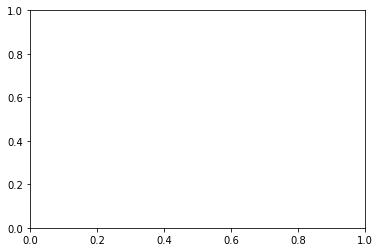

In [123]:
fig, ax = plt.subplots()
xg_disp = plot_roc_curve(xg, tfidf_test, y_test, ax=ax)
rfc_disp = plot_roc_curve(rfc, tfidf_test, y_test, alpha=0.8, ax=ax)

In [119]:
import pickle

In [120]:
filename = 'Random Forest.sav'
pickle.dump(rfc, open(filename, 'wb'))

In [121]:
filename = 'XGBoost.sav'
pickle.dump(xg, open(filename, 'wb'))